In [1]:
#import libraries
import sqlite3
from urllib.request import urlretrieve
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import seaborn as sns
import os
import requests as req
import json
import time
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from riotwatcher import LolWatcher, ApiError

In [2]:
#load the data
team_data = pd.read_csv('/Users/dankang/Desktop/SpringBoard/Capstone2/Capstone2/data/processed/Wrangled_LoL_Data.csv')

In [3]:
team_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   team                     10 non-null     object 
 1   gamesplayed              10 non-null     int64  
 2   Win_Percentage           10 non-null     float64
 3   Wins                     10 non-null     int64  
 4   Losses                   10 non-null     int64  
 5   patch                    10 non-null     float64
 6   gamelength               10 non-null     int64  
 7   kills                    10 non-null     int64  
 8   deaths                   10 non-null     int64  
 9   assists                  10 non-null     int64  
 10  teamkills                10 non-null     int64  
 11  teamdeaths               10 non-null     int64  
 12  doublekills              10 non-null     float64
 13  triplekills              10 non-null     float64
 14  quadrakills              10 n

In [4]:
team_data.head()

,team,gamesplayed,Win_Percentage,Wins,Losses,patch,gamelength,kills,deaths,assists,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
0,100 Thieves,343,0.408163,140,203,3458.42,691425,3738,4375,8491,...,-693.0,8119104.0,9819845.0,169897.0,8377873.0,9991499.0,171773.0,-258769.0,-171654.0,-1876.0
1,Cloud9,350,0.800000,280,70,3529.54,647248,5425,3010,12544,...,5761.0,8965908.0,10442803.0,178570.0,8138984.0,9864554.0,169407.0,826924.0,578249.0,9163.0
2,Counter Logic Gaming,259,0.216216,56,203,2611.91,536522,2520,3724,6321,...,-973.0,6087998.0,7485695.0,132846.0,6486816.0,7756322.0,135464.0,-398818.0,-270627.0,-2618.0
3,Dignitas,294,0.357143,105,189,2966.11,606053,2730,3248,6517,...,-2247.0,7049364.0,8534477.0,151025.0,7201586.0,8664747.0,154581.0,-152222.0,-130270.0,-3556.0
4,Evil Geniuses,399,0.508772,203,196,4025.28,801906,4382,4921,10241,...,-3269.0,9535064.0,11478334.0,197806.0,9719248.0,11602269.0,202692.0,-184184.0,-123935.0,-4886.0


In [5]:
#set index
team_data = team_data.set_index('team')


In [6]:
team_data.head()

,gamesplayed,Win_Percentage,Wins,Losses,patch,gamelength,kills,deaths,assists,teamkills,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
team,,,,,,,,,,,,,,,,,,,,,
100 Thieves,343,0.408163,140,203,3458.42,691425,3738,4375,8491,3738,...,-693.0,8119104.0,9819845.0,169897.0,8377873.0,9991499.0,171773.0,-258769.0,-171654.0,-1876.0
Cloud9,350,0.800000,280,70,3529.54,647248,5425,3010,12544,5425,...,5761.0,8965908.0,10442803.0,178570.0,8138984.0,9864554.0,169407.0,826924.0,578249.0,9163.0
Counter Logic Gaming,259,0.216216,56,203,2611.91,536522,2520,3724,6321,2520,...,-973.0,6087998.0,7485695.0,132846.0,6486816.0,7756322.0,135464.0,-398818.0,-270627.0,-2618.0
Dignitas,294,0.357143,105,189,2966.11,606053,2730,3248,6517,2730,...,-2247.0,7049364.0,8534477.0,151025.0,7201586.0,8664747.0,154581.0,-152222.0,-130270.0,-3556.0
Evil Geniuses,399,0.508772,203,196,4025.28,801906,4382,4921,10241,4382,...,-3269.0,9535064.0,11478334.0,197806.0,9719248.0,11602269.0,202692.0,-184184.0,-123935.0,-4886.0


In [7]:
#Check for NAs
team_data.isnull().sum()

gamesplayed       0
Win_Percentage    0
Wins              0
Losses            0
patch             0
                 ..
opp_xpat15        0
opp_csat15        0
golddiffat15      0
xpdiffat15        0
csdiffat15        0
Length: 80, dtype: int64

In [8]:
#lets see some summary stats
team_data.describe()

,gamesplayed,Win_Percentage,Wins,Losses,patch,gamelength,kills,deaths,assists,teamkills,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,1.000000e+01,1.000000e+01,10.000000,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.000000
mean,327.600000,0.485641,163.800000,163.800000,3304.042000,670861.800000,3661.700000,3665.200000,8736.700000,3661.700000,...,0.000000,7.915723e+06,9.503558e+06,166394.200000,7.915723e+06,9.503558e+06,166394.200000,0.000000,0.000000,0.000000
std,66.963008,0.167073,74.095734,45.628451,675.738212,129458.832582,1283.746691,861.194106,3050.100364,1283.746691,...,2937.691686,1.688328e+06,1.946924e+06,32717.002086,1.595214e+06,1.884294e+06,32643.522334,344631.146912,244477.562533,4522.214305
min,252.000000,0.216216,56.000000,70.000000,2540.860000,533869.000000,2086.000000,2065.000000,5005.000000,2086.000000,...,-3269.000000,6.066032e+06,7.349671e+06,129857.000000,6.016010e+06,7.235914e+06,127113.000000,-398818.000000,-270627.000000,-4886.000000
25%,267.750000,0.369898,113.750000,155.750000,2700.460000,571823.000000,2703.750000,3237.500000,6531.000000,2703.750000,...,-2227.750000,6.340178e+06,7.747890e+06,137390.750000,6.660381e+06,7.983428e+06,140035.000000,-226567.250000,-161308.000000,-3321.500000
50%,322.000000,0.498572,150.500000,182.000000,3247.160000,637703.500000,3325.000000,3650.500000,7738.500000,3325.000000,...,-833.000000,7.718410e+06,9.343544e+06,164206.000000,7.670285e+06,9.319009e+06,161994.000000,-40894.000000,-68264.000000,-962.500000
75%,360.500000,0.577885,203.000000,194.250000,3636.220000,752487.750000,4366.250000,4212.250000,10277.750000,4366.250000,...,1771.000000,8.939161e+06,1.049553e+07,183106.000000,8.653970e+06,1.039215e+07,181443.500000,106631.000000,98420.000000,2511.250000
max,455.000000,0.800000,280.000000,203.000000,4589.340000,930181.000000,5810.000000,4921.000000,14399.000000,5810.000000,...,5761.000000,1.105334e+07,1.318569e+07,230419.000000,1.098291e+07,1.308572e+07,230202.000000,826924.000000,578249.000000,9163.000000


In [9]:
#assess data types
team_data.dtypes

gamesplayed         int64
Win_Percentage    float64
Wins                int64
Losses              int64
patch             float64
                   ...   
opp_xpat15        float64
opp_csat15        float64
golddiffat15      float64
xpdiffat15        float64
csdiffat15        float64
Length: 80, dtype: object

In [10]:
#get the columns
team_data.columns

Index(['gamesplayed', 'Win_Percentage', 'Wins', 'Losses', 'patch',
       'gamelength', 'kills', 'deaths', 'assists', 'teamkills', 'teamdeaths',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills', 'firstblood',
       'team kpm', 'ckpm', 'firstdragon', 'dragons', 'opp_dragons',
       'elementaldrakes', 'opp_elementaldrakes', 'infernals', 'mountains',
       'clouds', 'oceans', 'dragons (type unknown)', 'elders', 'opp_elders',
       'firstherald', 'heralds', 'opp_heralds', 'firstbaron', 'barons',
       'opp_barons', 'firsttower', 'towers', 'opp_towers', 'firstmidtower',
       'firsttothreetowers', 'inhibitors', 'opp_inhibitors',
       'damagetochampions', 'dpm', 'wardsplaced', 'wpm', 'wardskilled', 'wcpm',
       'controlwardsbought', 'visionscore', 'vspm', 'totalgold', 'earnedgold',
       'earned gpm', 'goldspent', 'gspd', 'minionkills', 'monsterkills',
       'monsterkillsownjungle', 'monsterkillsenemyjungle', 'cspm', 'goldat10',
       'xpat10', 'csat10', 'opp_gol

In [11]:
team_data.Win_Percentage.value_counts()

0.584615    1
0.488372    1
0.216216    1
0.611111    1
0.800000    1
0.408163    1
0.557692    1
0.324324    1
0.357143    1
0.508772    1
Name: Win_Percentage, dtype: int64

In [12]:
#lets see who has highest win percentage
team_data.Win_Percentage.sort_values(ascending=False).head()

team
Cloud9           0.800000
Team Liquid      0.611111
FlyQuest         0.584615
Team SoloMid     0.557692
Evil Geniuses    0.508772
Name: Win_Percentage, dtype: float64

In [13]:
#lets see who has highest win percentage
team_data.kills.sort_values(ascending=False).head()

team
FlyQuest         5810
Cloud9           5425
Evil Geniuses    4382
Team SoloMid     4319
100 Thieves      3738
Name: kills, dtype: int64

We find that of the 5 teams with the highest win percentages, 4 of them have the highest number of kills. 

In [14]:
#lets see who has highest win percentage
team_data.assists.sort_values(ascending=False).head()

team
FlyQuest         14399
Cloud9           12544
Team SoloMid     10290
Evil Geniuses    10241
100 Thieves       8491
Name: assists, dtype: int64

Again, of the 5 teams with the highest win percentages, 4 of them rank highest on assists. This is likely another important feature. 

In [15]:
team_data.firstblood.sort_values(ascending=False).head()

team
FlyQuest         273.0
Team SoloMid     231.0
Cloud9           210.0
Evil Geniuses    189.0
100 Thieves      154.0
Name: firstblood, dtype: float64

Turns out first blood is also important, with 4 of the teams drawing first blood (getting first kill) in the match having the highest win percentages.

In [16]:
#lets track our important features
key_stats = ['Win_Percentage', 'Wins', 'Losses', 'kills', 'assists', 'firstblood']

In [17]:
team_data.firstdragon.sort_values(ascending=False).head()


team
Cloud9              238.0
Evil Geniuses       224.0
Team SoloMid        182.0
Golden Guardians    175.0
FlyQuest            175.0
Name: firstdragon, dtype: float64

Here, 4 of the 5 teams again show up. Interestingly Team Liquid has not shown up in any of these feature sets despite having the second highest win percentage...

In [18]:
#add this as another key feature
key_stats.append('firstdragon')

In [19]:
team_data.mountains.sort_values(ascending=False).head()

team
FlyQuest         287.0
Cloud9           259.0
Team SoloMid     231.0
Evil Geniuses    210.0
100 Thieves      210.0
Name: mountains, dtype: float64

In [20]:
key_stats.append('mountains')

In [21]:
team_data.oceans.sort_values(ascending=False).head()

team
100 Thieves      273.0
FlyQuest         266.0
Team SoloMid     252.0
Evil Geniuses    245.0
Cloud9           245.0
Name: oceans, dtype: float64

In [22]:
key_stats.append('oceans')

In [23]:
other_key_stats = ['deaths', 'firstblood','assists', 'wardskilled', 'controlwardsbought', 'firsttower', 'towers', 'firsttothreetowers', 'totalgold', 'earnedgold', 'goldspent', 'minionkills', 'monsterkills', 'inhibitors']


In [24]:
key_stats = key_stats + other_key_stats 

In [25]:
key_stats

['Win_Percentage',
 'Wins',
 'Losses',
 'kills',
 'assists',
 'firstblood',
 'firstdragon',
 'mountains',
 'oceans',
 'deaths',
 'firstblood',
 'assists',
 'wardskilled',
 'controlwardsbought',
 'firsttower',
 'towers',
 'firsttothreetowers',
 'totalgold',
 'earnedgold',
 'goldspent',
 'minionkills',
 'monsterkills',
 'inhibitors']

In [26]:
df_key_stats = team_data[key_stats]

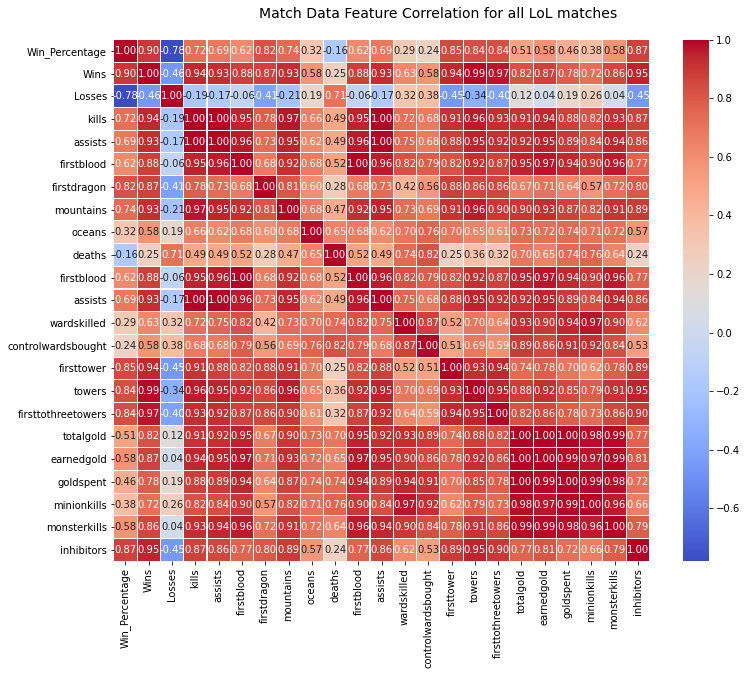

In [27]:
corrmat = df_key_stats.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Match Data Feature Correlation for all LoL matches', fontsize=14)

Here we can see that kills, assists, and firsttower are among the most important features with correlations higher than 0.93

<AxesSubplot:>

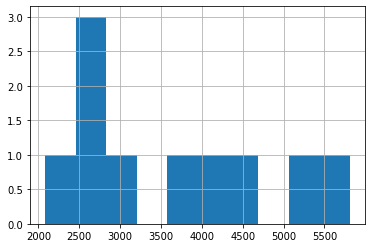

In [28]:
df_key_stats.kills.hist()

<AxesSubplot:>

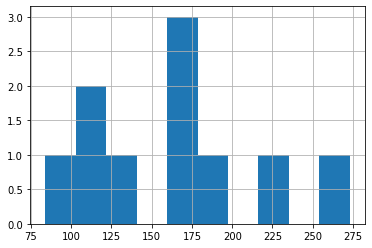

In [29]:
df_key_stats.firsttower.hist()

array([[<AxesSubplot:title={'center':'assists'}>,
        <AxesSubplot:title={'center':'assists'}>]], dtype=object)

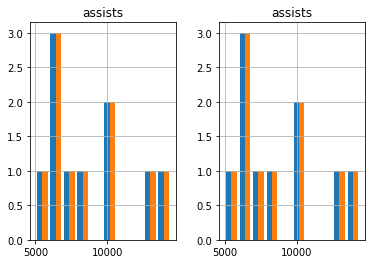

In [30]:
df_key_stats.assists.hist()

In [31]:
key_stats_scale = scale(df_key_stats)

In [32]:
df_key_stats_scaled = pd.DataFrame(key_stats_scale, columns=key_stats)
df_key_stats_scaled.head()

,Win_Percentage,Wins,Losses,kills,assists,firstblood,firstdragon,mountains,oceans,deaths,...,controlwardsbought,firsttower,towers,firsttothreetowers,totalgold,earnedgold,goldspent,minionkills,monsterkills,inhibitors
0,-0.488819,-0.338581,0.905585,0.062650,-0.084912,-0.172537,0.094585,0.483494,1.069190,0.868788,...,0.120500,0.209657,-0.118507,-0.519519,0.091946,0.047409,0.169672,0.105943,0.066687,0.010740
1,1.983342,1.653072,-2.166935,1.447857,1.315775,0.813390,1.671002,1.188589,0.588655,-0.801958,...,-0.498422,2.044155,1.395751,1.693247,0.277867,0.508935,0.109107,-0.228928,0.547876,1.514379
2,-1.699844,-1.533572,0.905585,-0.937457,-0.834848,-1.035224,-1.639473,-1.128152,-1.693885,0.071971,...,-1.069347,-1.493806,-1.490118,-1.289177,-1.159017,-1.180241,-1.114293,-1.074519,-1.284533,-1.600301
3,-0.810715,-0.836494,0.582162,-0.765025,-0.767112,-0.419019,-0.693623,-1.128152,-0.372414,-0.510648,...,-0.619680,-0.838628,-1.007311,-0.904348,-0.634916,-0.684825,-0.569950,-0.522008,-0.402022,-1.385496
4,0.145937,0.557663,0.743873,0.591443,0.519875,0.443667,1.355718,0.483494,0.588655,1.537086,...,1.578126,0.209657,0.715432,0.538760,0.967645,0.899955,1.039490,1.029960,0.920747,0.601456


In [33]:
df_key_stats.mean()

Win_Percentage        4.856409e-01
Wins                  1.638000e+02
Losses                1.638000e+02
kills                 3.661700e+03
assists               8.736700e+03
firstblood            1.638000e+02
firstdragon           1.638000e+02
mountains             1.764000e+02
oceans                2.107000e+02
deaths                3.665200e+03
firstblood            1.638000e+02
assists               8.736700e+03
wardskilled           1.624210e+04
controlwardsbought    1.440810e+04
firsttower            1.638000e+02
towers                2.000600e+03
firsttothreetowers    1.638000e+02
totalgold             1.925953e+07
earnedgold            1.196531e+07
goldspent             1.785544e+07
minionkills           2.876524e+05
monsterkills          6.970880e+04
inhibitors            3.486000e+02
dtype: float64

In [34]:
df_key_stats.std()

Win_Percentage        1.670733e-01
Wins                  7.409573e+01
Losses                4.562845e+01
kills                 1.283747e+03
assists               3.050100e+03
firstblood            5.987171e+01
firstdragon           4.680646e+01
mountains             7.325329e+01
oceans                6.142032e+01
deaths                8.611941e+02
firstblood            5.987171e+01
assists               3.050100e+03
wardskilled           3.714810e+03
controlwardsbought    2.920832e+03
firsttower            5.631025e+01
towers                6.724438e+02
firsttothreetowers    7.669536e+01
totalgold             3.997629e+06
earnedgold            2.617517e+06
goldspent             3.595596e+06
minionkills           5.438061e+04
monsterkills          1.478219e+04
inhibitors            1.374014e+02
dtype: float64

In [35]:
df_key_stats.std(ddof=0)

Win_Percentage        1.584997e-01
Wins                  7.029339e+01
Losses                4.328695e+01
kills                 1.217869e+03
assists               2.893579e+03
firstblood            5.679930e+01
firstdragon           4.440450e+01
mountains             6.949417e+01
oceans                5.826843e+01
deaths                8.170005e+02
firstblood            5.679930e+01
assists               2.893579e+03
wardskilled           3.524179e+03
controlwardsbought    2.770945e+03
firsttower            5.342060e+01
towers                6.379362e+02
firsttothreetowers    7.275960e+01
totalgold             3.792484e+06
earnedgold            2.483195e+06
goldspent             3.411082e+06
minionkills           5.158997e+04
monsterkills          1.402362e+04
inhibitors            1.303505e+02
dtype: float64

In [36]:
Lol_pca = PCA().fit(key_stats_scale)

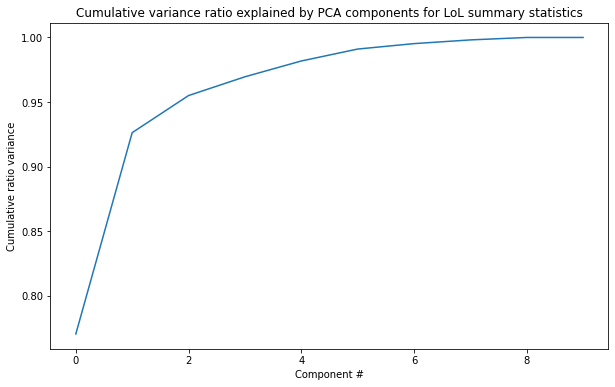

In [37]:
plt.subplots(figsize=(10, 6))
plt.plot(Lol_pca.explained_variance_ratio_.cumsum());
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for LoL summary statistics');

2 components account for 95% of the variance, and 5 account for 99%. 

In [43]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Wins', data=df_key_stats, alpha=0.5)
        ax.set(xlabel=col, ylabel='Number of Wins')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [44]:
features = [feature for feature in df_key_stats.columns if feature in ['kills', 'assists', 'firsttower', 'mountains']]